In [5]:
import pandas as pd
import seaborn as sbn
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [6]:
data={
    'Name': ['Mahi', 'Dhoni', 'King', 'Chiru','Kohli'],
    'Age': [15, 20, 25, 30, 35],
    'Income': [200,300,400,600,1000],
    'Height': [165, 170, 180, 160, 175]
}

In [7]:
data

{'Name': ['Mahi', 'Dhoni', 'King', 'Chiru', 'Kohli'],
 'Age': [15, 20, 25, 30, 35],
 'Income': [200, 300, 400, 600, 1000],
 'Height': [165, 170, 180, 160, 175]}

In [8]:
print(data)

{'Name': ['Mahi', 'Dhoni', 'King', 'Chiru', 'Kohli'], 'Age': [15, 20, 25, 30, 35], 'Income': [200, 300, 400, 600, 1000], 'Height': [165, 170, 180, 160, 175]}


In [9]:
#create a data frame
df=pd.DataFrame(data)
df

,Name,Age,Income,Height
0,Mahi,15,200,165
1,Dhoni,20,300,170
2,King,25,400,180
3,Chiru,30,600,160
4,Kohli,35,1000,175


In [10]:
print(df)

    Name  Age  Income  Height
0   Mahi   15     200     165
1  Dhoni   20     300     170
2   King   25     400     180
3  Chiru   30     600     160
4  Kohli   35    1000     175


In [11]:
#duplicates
df.duplicated()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [12]:
df[df.duplicated()]

,Name,Age,Income,Height


In [13]:
df.duplicated().sum()

0

In [14]:
df_dup=df.drop_duplicates()
df_dup

,Name,Age,Income,Height
0,Mahi,15,200,165
1,Dhoni,20,300,170
2,King,25,400,180
3,Chiru,30,600,160
4,Kohli,35,1000,175


In [16]:
#Normalization
min_max_scaler=MinMaxScaler()
df['Normalized_income']=min_max_scaler.fit_transform(df[['Income']])
df['Normalized_income']
df

,Name,Age,Income,Height,Normalized_Heights,Normalized_income
0,Mahi,15,200,165,0.25,0.000
1,Dhoni,20,300,170,0.50,0.125
2,King,25,400,180,1.00,0.250
3,Chiru,30,600,160,0.00,0.500
4,Kohli,35,1000,175,0.75,1.000


In [17]:
#Standardization
standardscaler=StandardScaler()
df['standard_income']=standardscaler.fit_transform(df[['Income']])
df['standard_income']
df

,Name,Age,Income,Height,Normalized_Heights,Normalized_income,standard_income
0,Mahi,15,200,165,0.25,0.000,-1.060660
1,Dhoni,20,300,170,0.50,0.125,-0.707107
2,King,25,400,180,1.00,0.250,-0.353553
3,Chiru,30,600,160,0.00,0.500,0.353553
4,Kohli,35,1000,175,0.75,1.000,1.767767


In [18]:
#formating
df['format_income']=df['Income'].apply(lambda x:"${:,.2f}".format(x))
df['format_income']
df

,Name,Age,Income,Height,Normalized_Heights,Normalized_income,standard_income,format_income
0,Mahi,15,200,165,0.25,0.000,-1.060660,$200.00
1,Dhoni,20,300,170,0.50,0.125,-0.707107,$300.00
2,King,25,400,180,1.00,0.250,-0.353553,$400.00
3,Chiru,30,600,160,0.00,0.500,0.353553,$600.00
4,Kohli,35,1000,175,0.75,1.000,1.767767,"$1,000.00"


<Axes: >

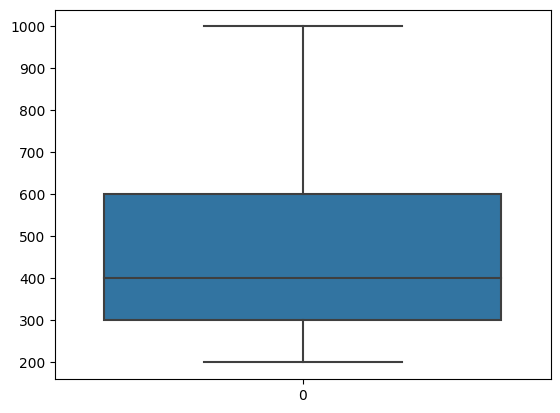

In [19]:
#outlier
sbn.boxplot(df['Income'])

In [20]:
q1=df['Income'].quantile(0.25)
q3=df['Income'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(300.0, 600.0, 300.0)

In [21]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(1050.0, -150.0)

In [22]:
outliers=df.loc[(df['Income']>upper_limit)|(df['Income']<lower_limit)]
outliers

,Name,Age,Income,Height,Normalized_Heights,Normalized_income,standard_income,format_income


In [23]:
#deleting outliers
new_df=df.loc[(df['Income']<upper_limit)&(df['Income']>lower_limit)]
new_df

,Name,Age,Income,Height,Normalized_Heights,Normalized_income,standard_income,format_income
0,Mahi,15,200,165,0.25,0.000,-1.060660,$200.00
1,Dhoni,20,300,170,0.50,0.125,-0.707107,$300.00
2,King,25,400,180,1.00,0.250,-0.353553,$400.00
3,Chiru,30,600,160,0.00,0.500,0.353553,$600.00
4,Kohli,35,1000,175,0.75,1.000,1.767767,"$1,000.00"


In [24]:
len(df)-len(new_df)

0

In [26]:
data1={
    'Name': ['Mahi', 'Dhoni', 'King', 'Chiru','Kohli','Rohit','Rohit'],
    'Age': [15, 20, 25, 30, 35,45,45],
    'Income': [200,300,400,600,1000,100000,100000],
    'Height': [165, 170, 180, 160, 175,185,185]
}

In [28]:
df1=pd.DataFrame(data1)
df1

,Name,Age,Income,Height
0,Mahi,15,200,165
1,Dhoni,20,300,170
2,King,25,400,180
3,Chiru,30,600,160
4,Kohli,35,1000,175
5,Rohit,45,100000,185
6,Rohit,45,100000,185


In [29]:
#duplicates
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [30]:
df1.duplicated().sum()

1

In [33]:
df1[df1.duplicated()]

,Name,Age,Income,Height
6,Rohit,45,100000,185


In [36]:
df1.drop_duplicates()

,Name,Age,Income,Height
0,Mahi,15,200,165
1,Dhoni,20,300,170
2,King,25,400,180
3,Chiru,30,600,160
4,Kohli,35,1000,175
5,Rohit,45,100000,185


In [95]:
#outliers
data3={
    'Name': ['Mahi', 'Dhoni', 'King', 'Chiru','Kohli'],
    'Age': [15, 20, 25, 30, 35],
    'Income': [-200000,3000,40000,90000,400000],
    'Height': [165, 170, 180, 160, 175]
}

In [96]:
df2=pd.DataFrame(data3)
df2

,Name,Age,Income,Height
0,Mahi,15,-200000,165
1,Dhoni,20,3000,170
2,King,25,40000,180
3,Chiru,30,90000,160
4,Kohli,35,400000,175


<Axes: >

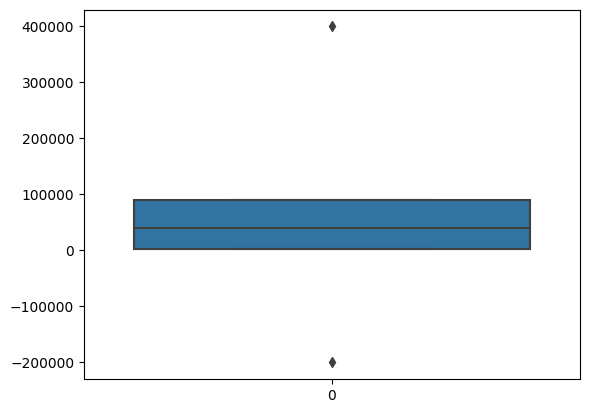

In [97]:
sbn.boxplot(df2['Income'])

In [98]:
q1=df2['Income'].quantile(0.25)
q3=df2['Income'].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(3000.0, 90000.0, 87000.0)

In [99]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
upper_limit,lower_limit

(220500.0, -127500.0)

In [100]:
#detecting outliers
outliers=df2.loc[(df2['Income']>upper_limit)|(df2['Income']<lower_limit)]
outliers

,Name,Age,Income,Height
0,Mahi,15,-200000,165
4,Kohli,35,400000,175


In [101]:
#Removing Outliers
newdf2=df2.loc[(df2['Income']<upper_limit)&(df2['Income']>lower_limit)]
newdf2

,Name,Age,Income,Height
1,Dhoni,20,3000,170
2,King,25,40000,180
3,Chiru,30,90000,160


In [102]:
len(df2)-len(newdf2)

2

In [103]:
newdf2=df2.copy()
newdf2

,Name,Age,Income,Height
0,Mahi,15,-200000,165
1,Dhoni,20,3000,170
2,King,25,40000,180
3,Chiru,30,90000,160
4,Kohli,35,400000,175


In [104]:
#capping change the outlier values to upper or lower limit values
newdf2.loc[(newdf2['Income'])>upper_limit,'Income']=upper_limit
newdf2.loc[(newdf2['Income'])<lower_limit,'Income']=lower_limit

<Axes: >

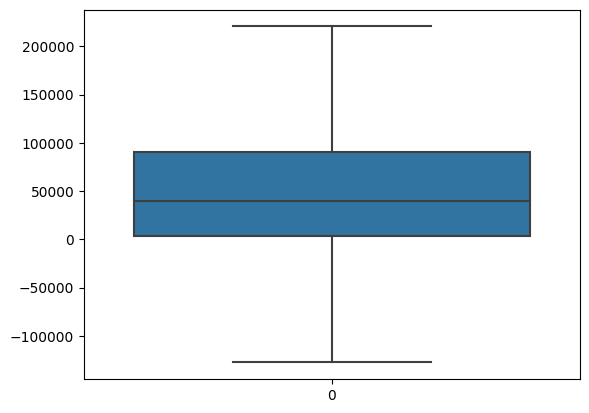

In [105]:
sbn.boxplot(newdf2['Income'])

In [106]:
newdf2

,Name,Age,Income,Height
0,Mahi,15,-127500,165
1,Dhoni,20,3000,170
2,King,25,40000,180
3,Chiru,30,90000,160
4,Kohli,35,220500,175
